## Important Info: Estimate the verification accuracy of DAC for project data when attacker doenot know the key
- Used DAC (RP projected) data to train an NN model
- Training data is project by a set of key
- Test data is projectd by a set of different key (assume that attacker does not know the key of the user) 
- Follow same RP approach that mentioned before
- Follow the same NN architecture
- For 10 rounds of training training accurach reached to 100.0% and validation accuracy reached to 100.0%
- However, for attacker data the accuracy reduced to 0.18%

In [1]:
#Read all data [194 users' oversampled data]
import csv
import pandas as pd
dataset=pd.read_csv('Dataset/OversampledDACData.csv',index_col=0)
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,57,58,59,60,61,62,63,64,65,Label
0,0.178862,0.316667,0.251082,0.144628,0.366255,0.323770,0.065844,0.020243,0.032129,0.060729,...,0.732435,0.736285,0.734870,0.707042,0.131098,0.196,1.0,0.279070,0.016393,0
1,0.166667,0.108333,0.069264,0.074380,0.246914,0.327869,0.213992,0.198381,0.116466,0.085020,...,0.670837,0.671800,0.670509,0.651643,0.170732,0.156,0.0,0.209302,0.234973,0
2,0.162602,0.112500,0.510823,0.280992,0.213992,0.040984,0.086420,0.052632,0.184739,0.259109,...,0.651588,0.651588,0.657061,0.642254,0.320122,0.124,0.0,0.186047,0.327869,0
3,0.085366,0.045833,0.025974,0.045455,0.181070,0.090164,0.045267,0.194332,0.188755,0.323887,...,0.641963,0.641963,0.645533,0.635681,0.204268,0.080,1.0,0.325581,0.054645,0
4,0.512195,0.295833,0.220779,0.247934,0.378601,0.069672,0.600823,0.785425,0.465863,0.477733,...,0.727623,0.732435,0.731028,0.694836,0.173780,0.504,0.0,0.255814,0.245902,0


In [2]:
dataset.shape

(57940, 66)

In [3]:
#replace the user ID by class name and count the number of sample in each class
dataset['Label'] = pd.factorize(dataset['Label'])[0]
dataset.groupby(['Label'])['Label'].count()

Label
0      300
1      300
2      300
3      300
4      300
      ... 
188    300
189    300
190    300
191    300
192    300
Name: Label, Length: 193, dtype: int64

In [4]:
#seperate the profile in two groups (80.0%, 20.0%): (i) Training profile (0-155), and (ii) auxiliary profile (156-192)
totalUser= len(pd.unique(dataset['Label']))
trainingData = dataset[dataset['Label'] <155]
auxilaryData = dataset[dataset['Label'] >= 155]
print("Total user in training dataset:", len(pd.unique(trainingData['Label'])))
print("Total user in auxiliary dataset:", len(pd.unique(auxilaryData['Label'])))
#assigned 0-154 users' data to dataset
dataset=trainingData

Total user in training dataset: 155
Total user in auxiliary dataset: 38


In [5]:
#total use in the system
totalUser= len(pd.unique(dataset['Label']))
trainingData=dataset
print("Total user in the training dataset:", len(pd.unique(trainingData['Label'])))

Total user in the training dataset: 155


In [6]:
#random project the training data
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56','Label']
column2=column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56']
trainDatasetRP = pd.DataFrame(columns=column1)

for seed in range(0,155):
    rng = np.random.RandomState(seed)
    X = trainingData[trainingData['Label']==seed]
    transformer = SparseRandomProjection(n_components=56, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    trainDatasetRP = pd.concat([trainDatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(trainingData.shape)
print(trainDatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_27740\1267165762.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trainDatasetRP = pd.concat([trainDatasetRP, XRP], ignore_index=True)


(46540, 66)
(46540, 57)


In [7]:
#Prepare group 1 traning data for training and validate the model
import tensorflow
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X=trainDatasetRP.drop(columns=['Label'])
y=trainDatasetRP['Label']

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=22)

#Xtest=testDatasetRP.drop(columns=['Label'])
#ytest=testDatasetRP['Label']

ytrain = to_categorical(ytrain)
yval = to_categorical(yval)
#ytest = to_categorical(ytest)

In [8]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xval.shape)
print(yval.shape)
#print(Xtest.shape)
#print(ytest.shape)

(37232, 56)
(37232, 155)
(9308, 56)
(9308, 155)


In [9]:
# import all necessary package for a neural network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inlineimport keras
from keras.layers import Dense, Dropout, Input,Activation,Dropout, Flatten
from keras.models import Model,Sequential
from keras.datasets import mnist
#from tqdm import tqdm
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.optimizers import Adam
#import torch.nn.functional as F

In [10]:
#define optimizers for neural network
from keras.optimizers import SGD, RMSprop, Adam
def adam_optimizer():
    return Adam(learning_rate=0.0002, beta_1=0.5)

def RMSprop_optimizer():
    return RMSprop(learning_rate=0.001, rho=0.9)

In [11]:
#neural network architecture for model training

def create_classifierRP(release=False,totalClass=155):
  classifier = Sequential()
  classifier.add(Dense(64, input_dim=56))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.5))
  
  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.2))
  
  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(64))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.3))

  #if release:
  classifier.add(Dense(totalClass, activation='softmax'))
  #else:
  #   classifier.add(Dense(Tuser))
  #np.log_softmax_v2(a, axis=axis)
  #classifier.add(F.softmax(a, dim=1))

  classifier.compile(loss='categorical_crossentropy', optimizer=RMSprop_optimizer(),metrics=['accuracy'])
  return classifier

Clasf=create_classifierRP()
Clasf.summary()

C:\Users\mdmor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 155)            │        10,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,323 (122.36 KB)

 Trainable params: 30,811 (120.36 KB)

 Non-trainable params: 512 (2.00 KB)

In [12]:
#Train the classifier seperately for black-box attack
import keras

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

Classfier2= create_classifierRP(True,155)

#------Comment will start from here
lossc='categorical_crossentropy'
optimizerc=RMSprop(learning_rate=0.001, rho=0.9)
Classfier2.compile(loss=lossc, optimizer=optimizerc,metrics=['accuracy'])
#------Comments will end from here
historyc2 =  Classfier2.fit(Xtrain, ytrain, batch_size=64, epochs=20, validation_data=(Xval, yval),verbose=1)

Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2072 - loss: 4.0019 - val_accuracy: 0.9926 - val_loss: 0.6503
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6901 - loss: 1.3186 - val_accuracy: 0.9975 - val_loss: 0.0483
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7716 - loss: 0.8373 - val_accuracy: 0.9997 - val_loss: 0.0131
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7992 - loss: 0.7020 - val_accuracy: 0.9997 - val_loss: 0.0074
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8232 - loss: 0.6197 - val_accuracy: 0.9997 - val_loss: 0.0052
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8338 - loss: 0.5672 - val_accuracy: 0.9997 - val_loss: 0.0042
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8424 - loss: 0.5431 - val_accuracy: 0.9998 - val_loss: 0.0033
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8558 - loss: 0.5036 - val_accuracy: 0.

Text(0.5, 0, 'epochs')

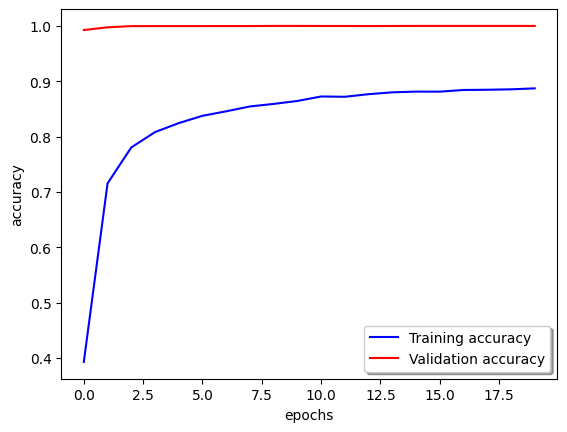

In [13]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(historyc2.history['accuracy'], color='b', label="Training accuracy")
plt.plot(historyc2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('accuracy')
plt.xlabel('epochs')

# Test by the data set that come from same user but different random matrix

In [14]:
#read the test data and seperate test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/DACDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] < 155]
#testdataset.head()

In [15]:
#random project the test data
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56','Label']
column2=column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56']
testDatasetRP = pd.DataFrame(columns=column1)

for seed in range(0,155):
    rng = np.random.RandomState(seed+1)
    X = testdataset[testdataset['Label']==seed]
    transformer = SparseRandomProjection(n_components=56, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    testDatasetRP = pd.concat([testDatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(testdataset.shape)
print(testDatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_27740\1841679469.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  testDatasetRP = pd.concat([testDatasetRP, XRP], ignore_index=True)


(4121, 66)
(4121, 57)


In [16]:
Xtest=testDatasetRP.drop(columns=['Label'])
ytest=testDatasetRP['Label']
ytest = to_categorical(ytest)

In [17]:
#Performance of the classifier
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0327 - loss: 19.7747
Loss: 20.4298152923584
Accuracy: 0.00897840317338705


# Test by the attack data

In [18]:
#invalid test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/DACDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] >= 155]
newID = np.random.randint(0, 155, size=testdataset.shape[0])
testdataset['Label'] = newID
testdataset.head()

,Label,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
23457,142,0.256098,0.070833,0.393939,0.392562,0.115226,0.028689,0.065844,0.101215,0.040161,...,0.746628,0.745910,0.743022,0.741595,0.735211,0.344512,0.248,0.0,0.139535,0.103825
22231,29,0.060976,0.045833,0.004329,0.024793,0.189300,0.143443,0.094650,0.141700,0.064257,...,0.752408,0.751684,0.749759,0.747358,0.728638,0.256098,0.088,1.0,0.232558,0.125683
21701,152,0.382114,0.262500,0.151515,0.103306,0.189300,0.209016,0.156379,0.153846,0.152610,...,0.929672,0.928778,0.928778,0.926993,0.906103,0.201220,0.372,0.0,0.139535,0.000000
23943,152,0.130081,0.075000,0.090909,0.020661,0.222222,0.352459,0.144033,0.157895,0.076305,...,0.859345,0.858518,0.864293,0.862632,0.839437,0.060976,0.216,0.0,0.093023,0.092896
22889,18,0.329268,0.025000,0.060606,0.045455,0.090535,0.114754,0.115226,0.218623,0.092369,...,0.458574,0.458133,0.459095,0.456292,0.442254,0.060976,0.200,1.0,0.325581,0.147541


In [19]:
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56','Label']
column2=column1=['RPF1','RPF2','RPF3','RPF4','RPF5','RPF6','RPF7','RPF8','RPF9','RPF10','RPF11','RPF12','RPF13','RPF14','RPF15',
         'RPF16','RPF17','RPF18','RPF19','RPF20','RPF21','RPF22','RPF23','RPF24','RPF25','RPF26','RPF27','RPF28','RPF29','RPF30',
         'RPF31','RPF32','RPF33','RPF34','RPF35','RPF36','RPF37','RPF38','RPF39','RPF40','RPF41','RPF42','RPF43','RPF44','RPF45',
         'RPF46','RPF47','RPF48','RPF49','RPF50','RPF51','RPF52','RPF53','RPF54','RPF55','RPF56']
testDatasetRP = pd.DataFrame(columns=column1)

testDatasetRP = pd.DataFrame(columns=column1)

for seed in range(0,155):
    rng = np.random.RandomState(seed+1)
    X = testdataset[testdataset['Label']==seed]
    transformer = SparseRandomProjection(n_components=56, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    testDatasetRP = pd.concat([testDatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(testdataset.shape)
print(testDatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_27740\3170691182.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  testDatasetRP = pd.concat([testDatasetRP, XRP], ignore_index=True)


(1003, 66)
(1003, 57)


In [20]:
Xtest=testDatasetRP.drop(columns=['Label'])
ytest=testDatasetRP['Label']
ytest = to_categorical(ytest)

In [21]:
#Performance of the classifier
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0014 - loss: 20.5291      
Loss: 20.293466567993164
Accuracy: 0.0009970089886337519
